Exploratory Data Analysis

In [183]:
import pandas as pd
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
tags_df = pd.read_csv('tags_df.csv')
rs_df = pd.read_csv('rs_df.csv')

EDA Questions:

1. What are the most popular tags?
   What are the most popular tags for the most popular (top 25%) stories?
   What are the most popular tags for the least popular (bottom 25%) stories?
2. What's the distribution of story votes?
3. Which authors have multiple stories?
4. Is the list of most popular related stories the same as the list of most popular stories?

In [7]:
tags_df.head()

,Unnamed: 0,Title,Author,Votes,Unnamed: 4,action,addiction,adventure,ai,airships,...,western,witches,wizards,wolves,wuxia,xianxia,youkai,young-adult,young-love,zombies
0,0,A Practical Guide to Evil,ErraticErrata,48110,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,Worm,Wildbow,39205,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Ward,wildbow,24154,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,The Wandering Inn,pirateaba,22462,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Metaworld Chronicles,Wutosama,20111,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
rs_df.head()

,Unnamed: 0,Title,Author,Votes,100 Luck and the Dragon Tamer Skill!,23 Pangbourne Place,A Bad Idea,A Devil in Gods Country,A Grey World,A Journey of Black and Red,...,Wonder City Stories,World Domination in Retrospect,World-ruling Dungeon,Worm,Worth the Candle,"Yes, Your Highness",Your Typical Isekai LitRPG,aka,asa kraiya,blacklight
0,0,A Practical Guide to Evil,ErraticErrata,48110,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Worm,Wildbow,39205,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Ward,wildbow,24154,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,The Wandering Inn,pirateaba,22462,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Metaworld Chronicles,Wutosama,20111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
votes = tags_df['Votes'].values

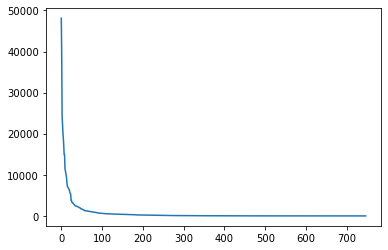

In [191]:
plt.plot(votes)

### TAGS ANALYSIS

In [192]:
sums = []
for x in tags_df.columns:
        try:
            sums.append(tags_df[x].sum())
        except:
            sums.append(0)

In [193]:
sums[0] = 'NA'
sums[1] = 'NA'
sums[2] = 'NA'
sums[3] = 'NA'
sums[4] = 'NA'

In [101]:
a_series = pd.Series(sums, index = tags_df.columns)
tags_df = tags_df.append(a_series, ignore_index=True)

In [102]:
tagsums = tags_df.iloc[747,:]

In [103]:
tagsums = tagsums.drop(['Title', 'Author', 'Votes', 'Unnamed: 0'])
tagsums = tagsums.sort_values(ascending=False)

<AxesSubplot:>

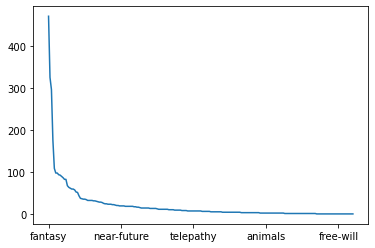

In [113]:
tagsums.plot()

In [254]:
sums = []
top_stories = tags_df[0:30]
for x in top_stories.columns:
        try:
            sums.append(top_stories[x].sum())
        except:
            sums.append(0)
sums[0] = 'NA'
sums[1] = 'NA'
sums[2] = 'NA'
sums[3] = 'NA'

In [255]:
a_series = pd.Series(sums, index = tags_df.columns)
top_stories = top_stories.append(a_series, ignore_index=True)

In [256]:
top_story_tagsums = top_stories.drop(['Title', 'Author', 'Votes', 'Unnamed: 0', 'Unnamed: 4'], axis=1)
top_story_tagsums = top_story_tagsums.iloc[30,:].sort_values(ascending=False)

In [257]:
top_story_tagsums = pd.DataFrame(top_story_tagsums)
top_story_tagsums['title'] = top_story_tagsums.index
top_story_tagsums.index = range(len(top_story_tagsums))

In [258]:
tagsums = pd.DataFrame(tagsums)
tagsums['title'] = tagsums.index
tagsums.index = range(len(tagsums))

In [260]:
top_story_tagsums

,30,title
0,22,fantasy
1,15,adventure
2,14,action
3,10,magic
4,6,humor
5,6,superhero
6,6,young-adult
7,5,rpgs
8,5,sword-and-sorcery
9,4,dark-fantasy


In [261]:
tagsums

,747,title
0,470,0
1,325,1
2,296,2
3,176,3
4,109,4
5,98,5
6,98,6
7,94,7
8,93,8
9,90,9


### RELATED STORIES ANALYSIS

In [114]:
sums = []
for x in rs_df.columns:
        try:
            sums.append(rs_df[x].sum())
        except:
            sums.append(0)

In [116]:
sums[0] = 'NA'
sums[1] = 'NA'
sums[2] = 'NA'
sums[3] = 'NA'

In [119]:
a_series = pd.Series(sums, index = rs_df.columns)
rs_df = rs_df.append(a_series, ignore_index=True)

In [152]:
rssums = rs_df.iloc[747,:]

In [153]:
rssums = rssums.drop(['Title', 'Author', 'Votes', 'Unnamed: 0'])
rssums = rssums.sort_values(ascending=False)

<AxesSubplot:>

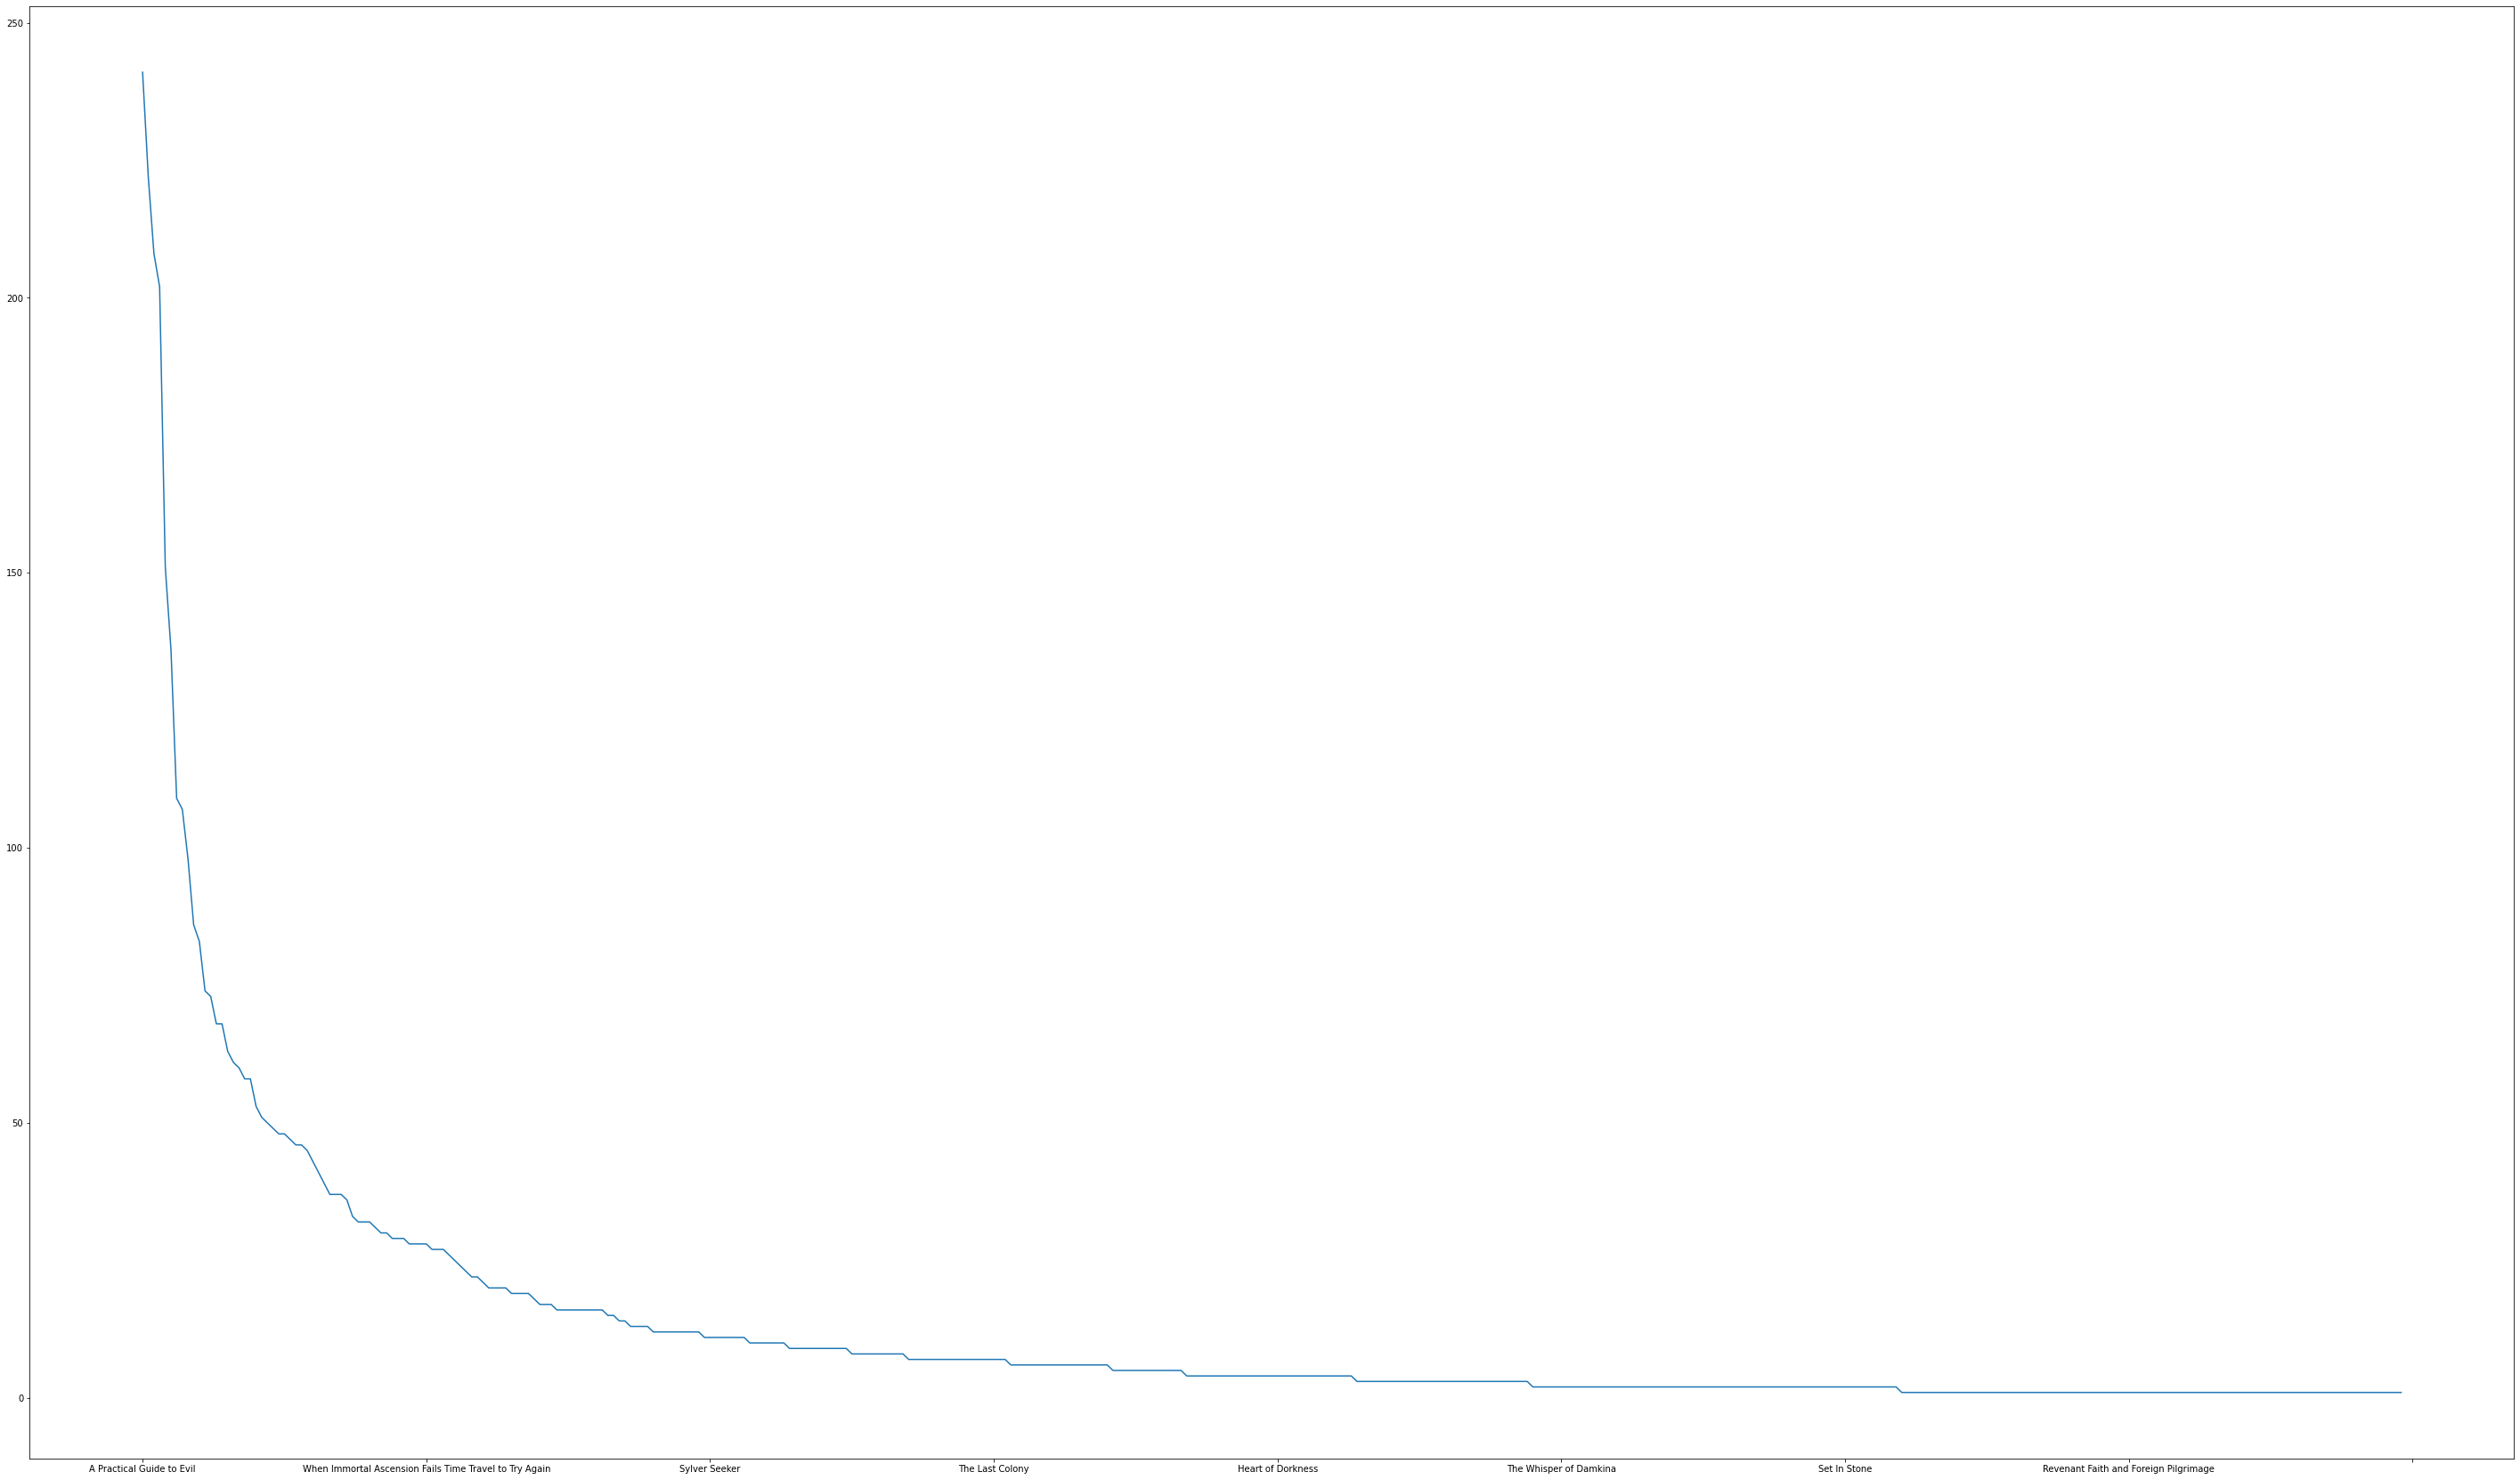

In [165]:
rssums.plot(figsize=(50,30))

In [ ]:
rankcompare['relindex'] = range(len(rankcompare))
rankcompare['Title'] = rankcompare.index
#rankcompare['absindex'] = 

In [ ]:
pd.set_option('display.max_rows', None)

In [164]:
pd.merge(rankcompare, rs_df, on='Title').iloc[:,1:20]

NameError: name 'rankcompare' is not defined